## КЛАСТЕРИЗАЦИЯ

Исходный датасет: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

Модели для обучения: 
* K-средних (K-means)
* Агломеративная кластеризация
* Спектральная кластеризация
* DBSCAN
* Метод распространения близости (Affinity Propagation)

Значения признаков (столбцы):

1. Люди

* ID: Уникальный идентификатор клиента
* Year_Birth: год рождения Клиента
* Education: уровень образования Клиента
* Marital_Status: семейное положение Клиента
* Доход: годовой доход семьи клиента
* Kidhome: Количество детей в семье клиента
* Teenhome: Количество подростков в семье клиента
* Dt_Customer: Дата регистрации клиента в компании
* Recency: Количество дней, прошедших с момента последней покупки клиента
* Complain: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

2. Продукты

* MntWines: Сумма, потраченная на вино за последние 2 года
* MntFruits: Сумма, потраченная на фрукты за последние 2 года
* MntMeatProducts: Количество, потраченное на мясо за последние 2 года
* MntFishProducts: Количество, потраченное на рыбу за последние 2 года
* MntSweetProducts: Количество, потраченное на сладости за последние 2 года
* MntGoldProds: Сумма, потраченная на золото за последние 2 года

3. Продвижение

* NumDealsPurchases: Количество покупок, совершенных со скидкой
* AcceptedCmp1: 1, если клиент принял предложение в рамках первой кампании, 0 в противном случае
* AcceptedCmp2: 1, если клиент принял предложение во 2-й кампании, в противном случае 0
* AcceptedCmp3: 1, если клиент принял предложение в 3-й кампании, в противном случае 0
* AcceptedCmp4: 1, если клиент принял предложение в 4-й кампании, в противном случае 0
* AcceptedCmp5: 1, если клиент принял предложение в 5-й кампании, в противном случае 0
* Response: 1, если клиент принял предложение в последней кампании, в противном случае 0

4. Место

* NumWebPurchases: Количество покупок, совершенных через веб-сайт компании
* NumCatalogPurchases: Количество покупок, совершенных с использованием каталога
* NumStorePurchases: Количество покупок, совершенных непосредственно в магазинах
* NumWebVisitsMonth: Количество посещений веб-сайта компании за последний месяц

### 1. Предобработка данных

https://habr.com/ru/articles/800973/

Проверка данных включает выявление:

* дубликатов, противоречий, ошибок;

* аномальных наблюдений;

* пропусков.


Очистка данных содержит:

* устранение дубликатов, противоречий и ошибок;

* обработку аномальных наблюдений;

* обработку пропусков.


Трансформация данных включает:

* переименование признаков;

* сортировка, группировка данных;

* кодирование переменных;

* нормировка данных.


Дополнение данных:

* создание новых признаков;

* агрегирование признаков


Оптимизация данных включает:

* снижение размерности;

* выявление и исключение незначительных признаков.

In [186]:
import pandas as pd
import numpy as np

In [187]:
pd.set_option('display.max_columns', None)

In [188]:
url = r'C:\pet projects\pet-projects\customer personality\data\marketing_campaign.csv'

In [189]:
customer_data  = pd.read_csv(url, sep='\t')
customer_data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [190]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [191]:
customer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [192]:
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [193]:
customer_data.replace(np.nan, 0, inplace=True)

In [194]:
customer_data.duplicated().sum()

0

In [195]:
customer_data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_13944\470732902.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data[col], palette="Set2", ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_13944\470732902.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data[col], palette="Set2", ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_13944\470732902.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data[col], palette="Set2", ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_13944\470

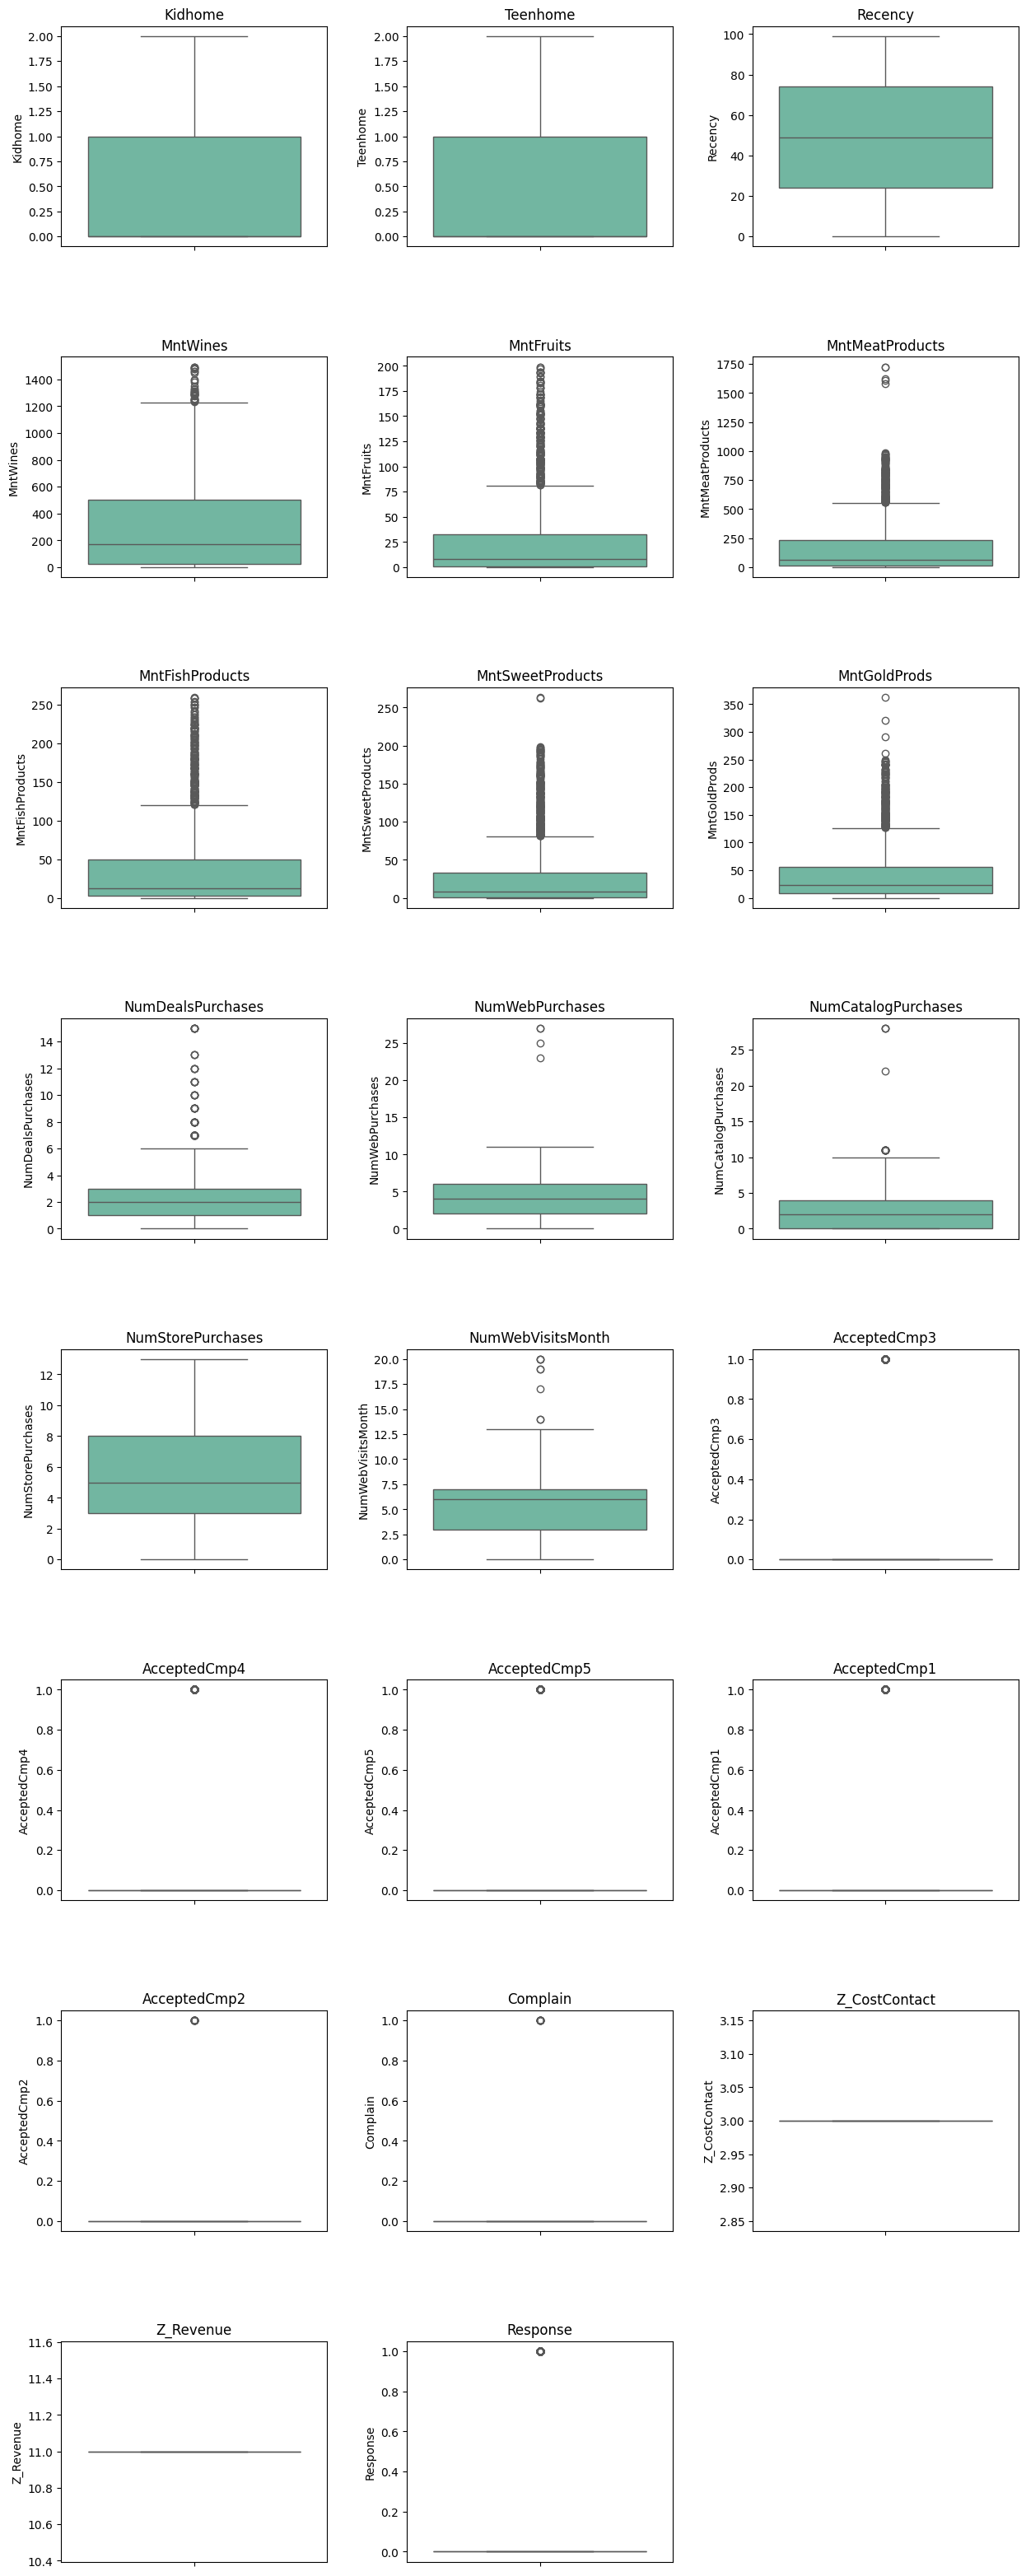

In [197]:

num_cols = [col for col in customer_data.columns if customer_data[col].dtype == 'int64' and col not in ['ID', 'Year_Birth']]

ncols = 3  
nrows = int(np.ceil(len(num_cols) / ncols)) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))  
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=customer_data[col], palette="Set2", ax=axes[i])
    axes[i].set_title(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()

Замечены выбросы у: 

In [198]:
anomaly_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumWebVisitsMonth']
anomaly_columns

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth']

In [199]:
import scipy.stats as stats

C:\Users\User\AppData\Local\Temp\ipykernel_13944\3335266301.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


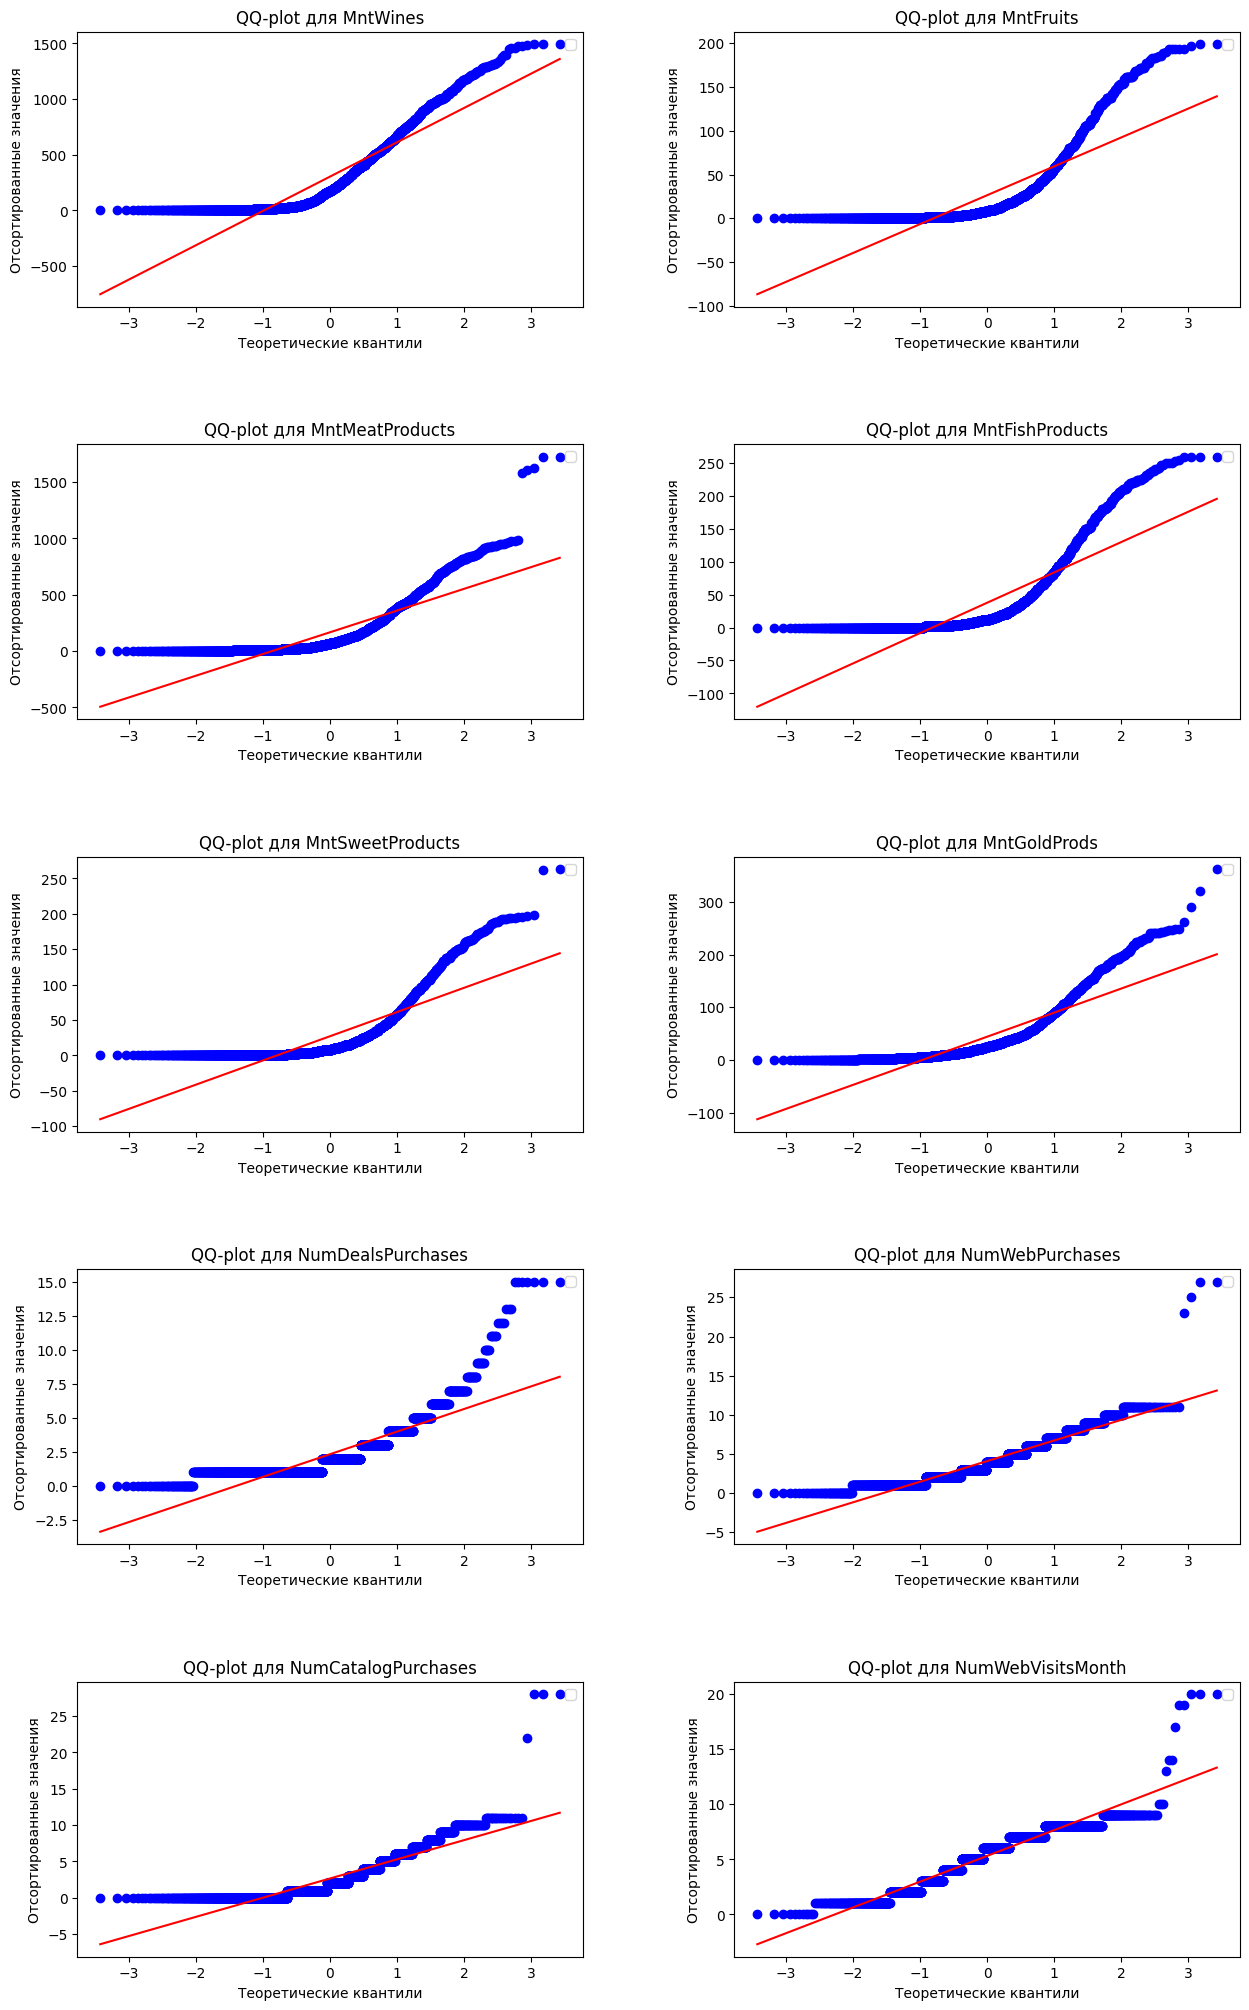

In [200]:
import matplotlib.pyplot as plt
import numpy as np

ncols = 2
nrows = int(np.ceil(len(anomaly_columns) / ncols)) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))  
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

axes = axes.flatten()

for i, col in enumerate(anomaly_columns):
    if col in customer_data.columns: 
        stats.probplot(customer_data[col], dist="norm", plot=axes[i])
        axes[i].set_title(f'QQ-plot для {col}')
        axes[i].set_xlabel("Теоретические квантили")
        axes[i].set_ylabel("Отсортированные значения")
        axes[i].legend()

for j in range(len(anomaly_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()


У всех количественнх данных заметны проблемы с нормальной распределенностью  

Проведём z-тест для данных

In [201]:
from statsmodels.stats.weightstats import ztest

In [202]:
for i, col in enumerate(anomaly_columns):
    tstat, pvalue = ztest(customer_data[col])
    print(f"Признак {col}: p_value = {pvalue}, tstat={tstat}")

Признак MntWines: p_value = 0.0, tstat=42.73611083507745
Признак MntFruits: p_value = 4.890786385163353e-215, tstat=31.298500351122275
Признак MntMeatProducts: p_value = 1.7886148757123438e-268, tstat=35.00654860313687
Признак MntFishProducts: p_value = 7.519402376745146e-232, tstat=32.510735129152074
Признак MntSweetProducts: p_value = 2.2580948373212947e-211, tstat=31.028026521391755
Признак MntGoldProds: p_value = 0.0, tstat=39.93861766930895
Признак NumDealsPurchases: p_value = 0.0, tstat=56.94904685211093
Признак NumWebPurchases: p_value = 0.0, tstat=69.57499962738916
Признак NumCatalogPurchases: p_value = 0.0, tstat=43.10196102377784
Признак NumWebVisitsMonth: p_value = 0.0, tstat=103.69194896619445


Окончательно убедились в том, что данные нормально не распределены - начнём обработку выбросов/аномалий

In [203]:
quantile_05 = {}  
list_05 = []

print(f'Значения квантилей 0.05')

for i, col in enumerate(anomaly_columns):
    quantile_value = customer_data[col].quantile(0.05)
    print(f'Признак {col}: {quantile_value}')
    list_05.append(quantile_value)
    quantile_05[col] = quantile_value

quantile_05_df = pd.DataFrame(list(quantile_05.items()), columns=['Feature', 'Quantile_0.05'])

Значения квантилей 0.05
Признак MntWines: 3.0
Признак MntFruits: 0.0
Признак MntMeatProducts: 4.0
Признак MntFishProducts: 0.0
Признак MntSweetProducts: 0.0
Признак MntGoldProds: 1.0
Признак NumDealsPurchases: 1.0
Признак NumWebPurchases: 1.0
Признак NumCatalogPurchases: 0.0
Признак NumWebVisitsMonth: 1.0


In [204]:
quantile_95 = {}  
list_95 = []

print(f'Значения квантилей 0.95')

for i, col in enumerate(anomaly_columns):
    quantile_value = customer_data[col].quantile(0.99)
    print(f'Признак {col}: {quantile_value}')
    list_95.append(quantile_value)
    quantile_95[col] = quantile_value

quantile_95_df = pd.DataFrame(list(quantile_95.items()), columns=['Feature', 'Quantile_0.05'])

Значения квантилей 0.95
Признак MntWines: 1285.0
Признак MntFruits: 172.0
Признак MntMeatProducts: 915.0
Признак MntFishProducts: 226.22000000000025
Признак MntSweetProducts: 177.22000000000025
Признак MntGoldProds: 227.0
Признак NumDealsPurchases: 10.0
Признак NumWebPurchases: 11.0
Признак NumCatalogPurchases: 10.610000000000127
Признак NumWebVisitsMonth: 9.0


In [205]:
quantile_95 = {}
for col in anomaly_columns:
    quantile_95[col] = customer_data[col].quantile(0.95)
quantile_05_df['Quantile_0.95'] = quantile_95.values()

for col in anomaly_columns:
    q_05 = quantile_05_df.loc[quantile_05_df['Feature'] == col, 'Quantile_0.05'].values[0]
    q_95 = quantile_05_df.loc[quantile_05_df['Feature'] == col, 'Quantile_0.95'].values[0]
    
    customer_data = customer_data[(customer_data[col] >= q_05) & (customer_data[col] <= q_95)]

In [206]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 1 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1376 non-null   int64  
 1   Year_Birth           1376 non-null   int64  
 2   Education            1376 non-null   object 
 3   Marital_Status       1376 non-null   object 
 4   Income               1376 non-null   float64
 5   Kidhome              1376 non-null   int64  
 6   Teenhome             1376 non-null   int64  
 7   Dt_Customer          1376 non-null   object 
 8   Recency              1376 non-null   int64  
 9   MntWines             1376 non-null   int64  
 10  MntFruits            1376 non-null   int64  
 11  MntMeatProducts      1376 non-null   int64  
 12  MntFishProducts      1376 non-null   int64  
 13  MntSweetProducts     1376 non-null   int64  
 14  MntGoldProds         1376 non-null   int64  
 15  NumDealsPurchases    1376 non-null   int64 

In [207]:
for col in customer_data.columns:
    print(f'Признак {col}: {customer_data[col].unique()}')

Признак ID: [2174 4141 6182 ... 7270 8235 9405]
Признак Year_Birth: [1954 1965 1984 1981 1967 1971 1985 1983 1976 1952 1987 1980 1946 1982
 1949 1969 1989 1963 1970 1951 1973 1959 1975 1957 1977 1966 1988 1968
 1948 1958 1960 1972 1945 1964 1978 1979 1991 1962 1953 1961 1956 1974
 1955 1900 1893 1986 1947 1992 1950 1943 1994 1944 1990 1995 1940]
Признак Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Признак Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'YOLO']
Признак Income: [46344. 71613. 26646. ... 56981. 69245. 52869.]
Признак Kidhome: [1 0 2]
Признак Teenhome: [1 0 2]
Признак Dt_Customer: ['08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014' '09-09-2013'
 '13-11-2012' '08-05-2013' '15-11-2013' '10-10-2012' '24-12-2012'
 '31-08-2012' '03-11-2012' '08-08-2012' '23-12-2012' '11-01-2014'
 '02-01-2013' '27-05-2013' '31-05-2013' '22-05-2014' '11-05-2013'
 '29-10-2012' '20-02-2013' '29-08-2013' '31-12-2013' '02-09-2013'
 '11-02-2014' '12-03-2013' '

Удалим столбцы Z_CostContact и Z_Revenue, поскольку осталось только одно уникальное значение

In [208]:
customer_data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

Изучим взаимодействие между признаками через тепловую карту и матрицу корреляции

Для числовых значений: 

<Axes: >

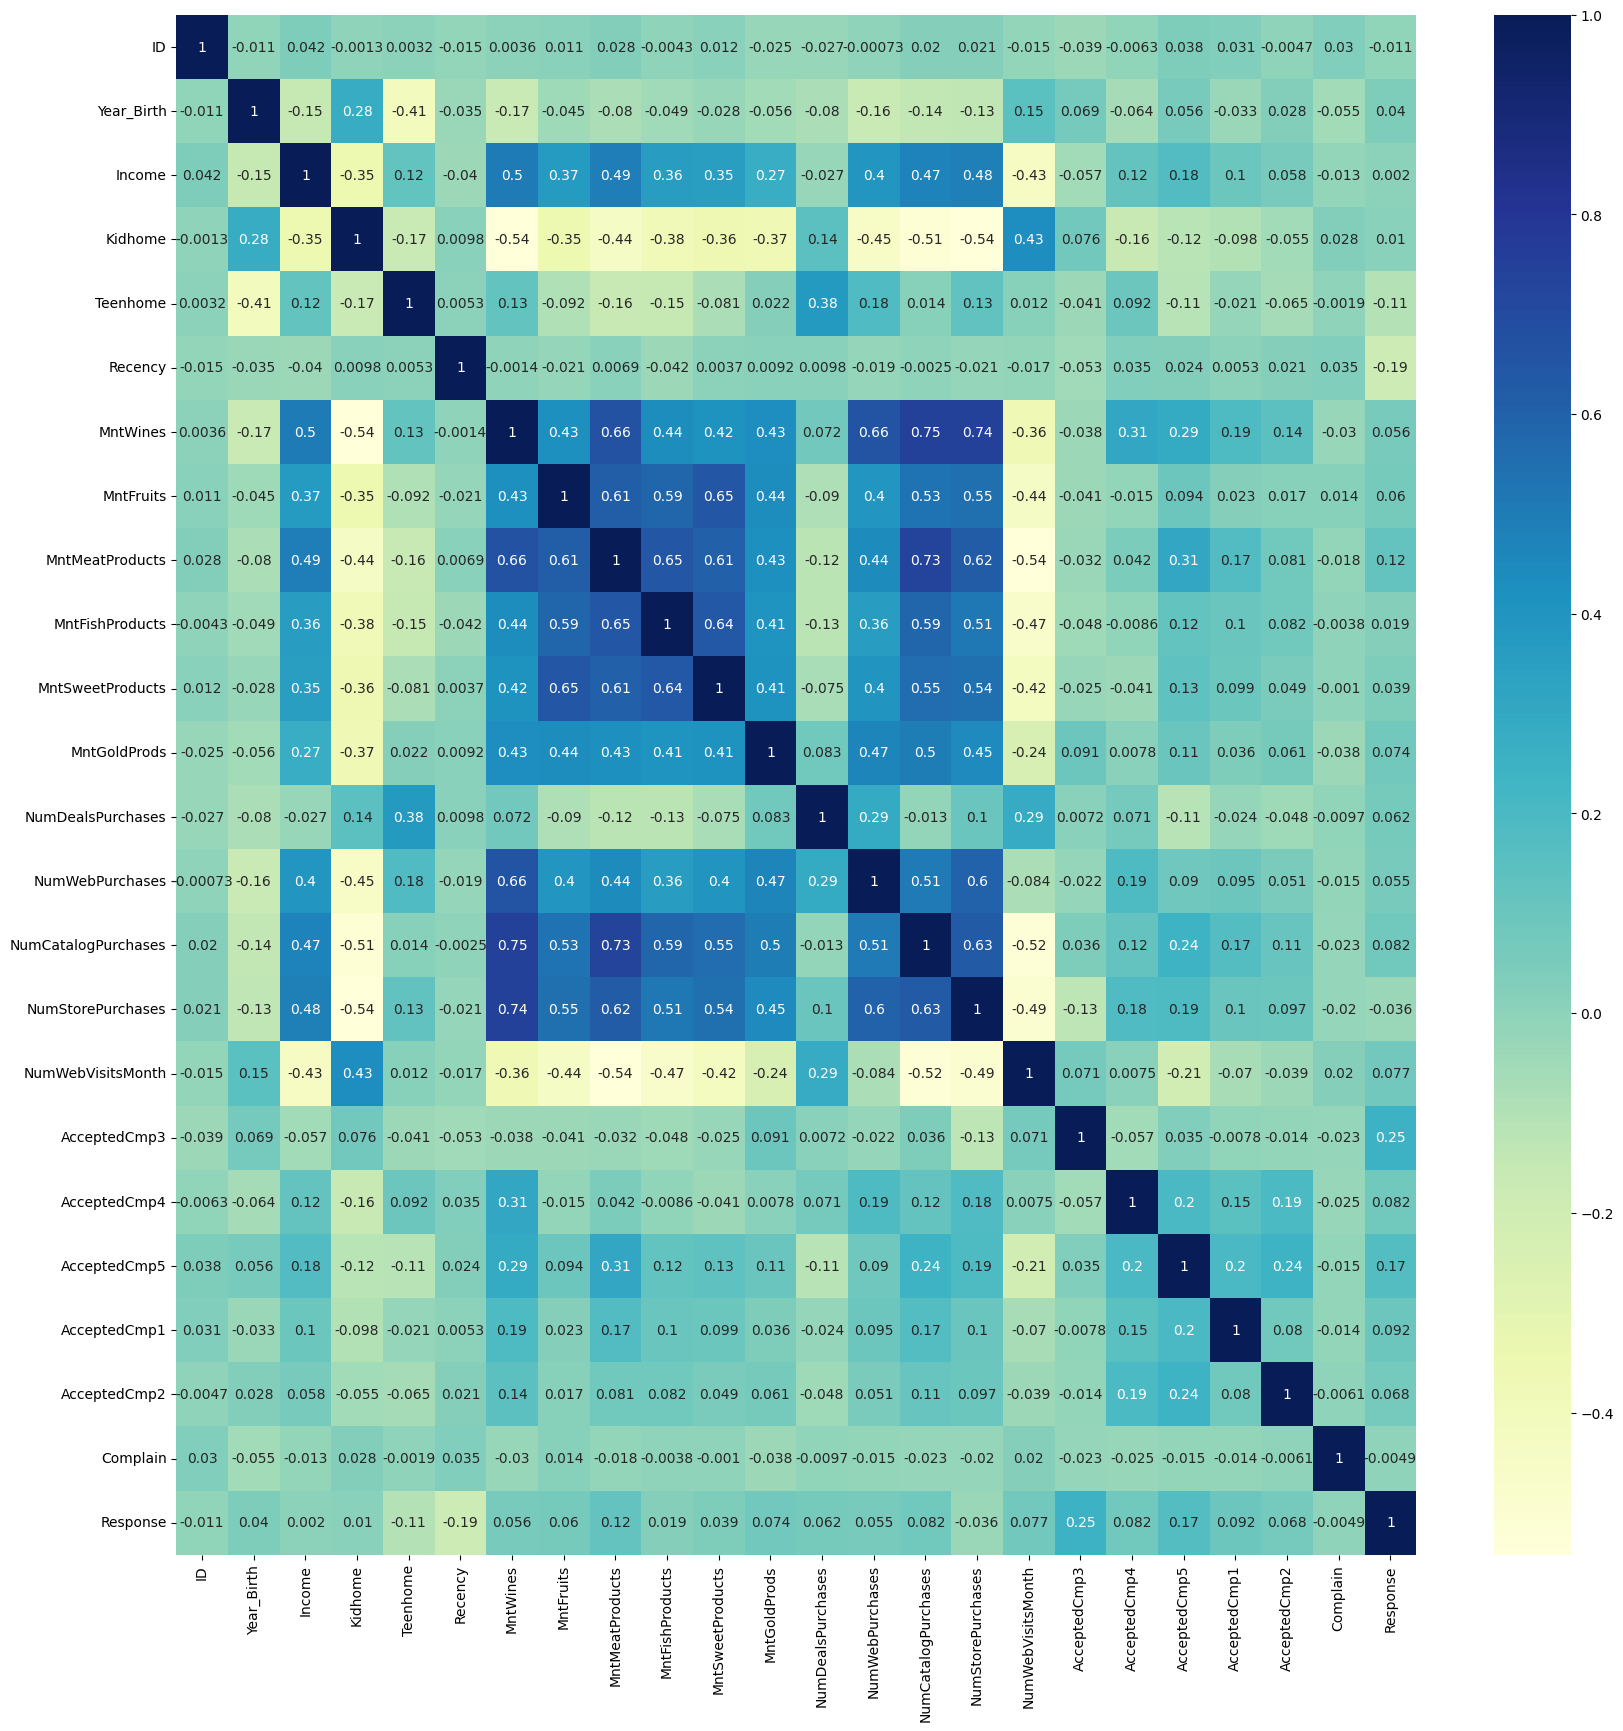

In [209]:
plt.figure(figsize=(20, 20))
sns.heatmap(customer_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [210]:
matrix_corr = customer_data.corr(numeric_only=True)

high_corr_features = set()
threshold = 0.3

for col in matrix_corr.columns:
    high_corr = matrix_corr[col][(matrix_corr[col] > threshold) & (matrix_corr[col] < 1.0)]
    if not high_corr.empty:
        high_corr_features.add(col)

filtered_data = customer_data[list(high_corr_features)]

print(filtered_data)

      AcceptedCmp4  Teenhome  NumDealsPurchases  NumWebVisitsMonth  \
1                0         1                  2                  5   
2                0         0                  1                  4   
3                0         0                  2                  6   
4                0         0                  5                  5   
5                0         1                  2                  6   
...            ...       ...                ...                ...   
2233             0         0                  4                  6   
2234             0         0                  1                  7   
2237             1         0                  1                  6   
2238             0         1                  2                  3   
2239             0         1                  3                  7   

      MntGoldProds  NumCatalogPurchases  MntMeatProducts    Income  \
1                6                    1                6   46344.0   
2               42 

Посмотрим на категориальные данные и их взаимодействие между собой.

In [211]:
def cramers_v(x, y):
    """Функция вычисляет коэффициент Cramér's V для двух категориальных переменных."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_columns = customer_data.select_dtypes(include=['object', 'category']).columns

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0 
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(customer_data[col1], customer_data[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

print(cramers_v_matrix)


                Education  Marital_Status  Dt_Customer
Education        1.000000        0.059544     0.709687
Marital_Status   0.059544        1.000000     0.654388
Dt_Customer      0.709687        0.654388     1.000000


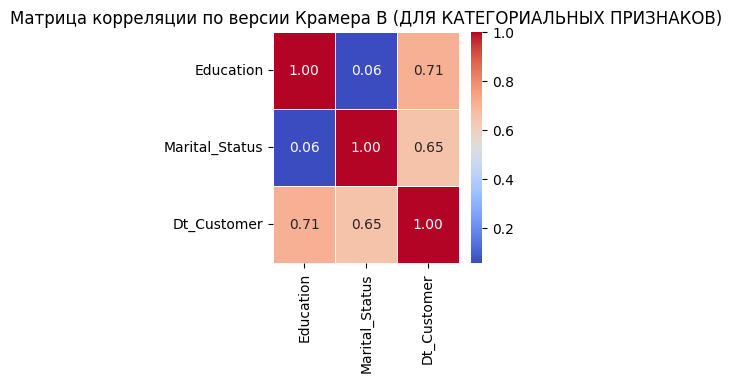

In [212]:
plt.figure(figsize=(3, 3))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции по версии Крамера В (ДЛЯ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ)")
plt.show()

Самым коррелирующим оказался Dt_Customer


Посмотрим на взаимодействие для каждого категориального признака с количественными признаком (однофакторный ANOVA тест)

In [213]:
categorical_cols = customer_data.select_dtypes(include=['object', 'category']).columns
numerical_cols = filtered_data.select_dtypes(include=['int64', 'float64']).columns

def anova_test(df, cat_col, num_col):
    """Проводит ANOVA-тест между категориальной и числовой переменной"""
    groups = [df[num_col][df[cat_col] == cat] for cat in df[cat_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    return p_value

anova_results = []

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        p_value = anova_test(customer_data, cat_col, num_col)
        anova_results.append({'Категория': cat_col, 'Числовая переменная': num_col, 'p-value': p_value})

anova_results_df = pd.DataFrame(anova_results)
significant_results = anova_results_df[anova_results_df['p-value'] < 0.05]

print("Значимые взаимосвязи (p < 0.05):")
print(significant_results)


Значимые взаимосвязи (p < 0.05):
         Категория  Числовая переменная       p-value
1        Education             Teenhome  2.924020e-04
3        Education    NumWebVisitsMonth  4.818306e-02
4        Education         MntGoldProds  1.177429e-03
5        Education  NumCatalogPurchases  9.141393e-03
6        Education      MntMeatProducts  2.297196e-02
7        Education               Income  7.182585e-06
8        Education      NumWebPurchases  1.492426e-05
9        Education     MntSweetProducts  1.916714e-05
10       Education    NumStorePurchases  5.320113e-05
11       Education             MntWines  4.107850e-12
12       Education      MntFishProducts  2.432407e-03
13       Education            MntFruits  6.835458e-03
17  Marital_Status             Teenhome  5.665354e-03
24  Marital_Status      NumWebPurchases  6.999376e-03
32     Dt_Customer         AcceptedCmp4  3.165534e-02
33     Dt_Customer             Teenhome  1.046317e-02
34     Dt_Customer    NumDealsPurchases  3.541740

Самыми значимыми признаками среди количественных остаются: 

In [214]:
categor_corr_count = significant_results['Числовая переменная'].unique()
np.append(categor_corr_count)

TypeError: append() missing 1 required positional argument: 'values'

In [ ]:
filtered_data

,AcceptedCmp4,Teenhome,NumDealsPurchases,NumWebVisitsMonth,MntGoldProds,NumCatalogPurchases,MntMeatProducts,Income,NumWebPurchases,MntSweetProducts,NumStorePurchases,MntWines,MntFishProducts,MntFruits,Kidhome,AcceptedCmp5,ID
1,0,1,2,5,6,1,6,46344.0,1,1,2,11,2,1,1,0,2174
2,0,0,1,4,42,2,127,71613.0,8,21,10,426,111,49,0,0,4141
3,0,0,2,6,5,0,20,26646.0,2,3,4,11,10,4,1,0,6182
4,0,0,5,5,15,3,118,58293.0,5,27,6,173,46,43,1,0,5324
5,0,1,2,6,14,4,98,62513.0,6,42,10,520,0,42,0,0,7446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,0,4,6,12,1,18,666666.0,3,1,3,9,8,14,1,0,9432
2234,0,0,1,7,9,0,7,34421.0,1,2,2,3,6,3,1,0,8372
2237,1,0,1,6,24,3,217,56981.0,2,12,13,908,32,48,0,0,7270
2238,0,1,2,3,61,5,214,69245.0,6,30,10,428,80,30,0,0,8235


In [ ]:
customer_data_filtered = filtered_data[categor_corr_count].copy() 
customer_data_filtered.loc[:, ['Education', 'Marital_Status', 'Dt_Customer']] = customer_data.loc[:, ['Education', 'Marital_Status', 'Dt_Customer']]

In [ ]:
customer_data.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


In [ ]:
customer_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 1 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Teenhome             1376 non-null   int64 
 1   NumWebVisitsMonth    1376 non-null   int64 
 2   MntGoldProds         1376 non-null   int64 
 3   NumCatalogPurchases  1376 non-null   int64 
 4   MntMeatProducts      1376 non-null   int64 
 5   NumWebPurchases      1376 non-null   int64 
 6   MntSweetProducts     1376 non-null   int64 
 7   NumStorePurchases    1376 non-null   int64 
 8   MntWines             1376 non-null   int64 
 9   MntFishProducts      1376 non-null   int64 
 10  MntFruits            1376 non-null   int64 
 11  AcceptedCmp4         1376 non-null   int64 
 12  NumDealsPurchases    1376 non-null   int64 
 13  Education            1376 non-null   object
 14  Marital_Status       1376 non-null   object
 15  Dt_Customer          1376 non-null   object
dtypes: int64(13

Закодируем категориальные переменные (отбросим в итоге столбец Dt_Customer)

In [ ]:
customer_data_filtered = pd.get_dummies(customer_data_filtered.drop(['Dt_Customer'], axis=1))

In [ ]:
customer_data_filtered

,Teenhome,NumWebVisitsMonth,MntGoldProds,NumCatalogPurchases,MntMeatProducts,NumWebPurchases,MntSweetProducts,NumStorePurchases,MntWines,MntFishProducts,MntFruits,AcceptedCmp4,NumDealsPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1,1,5,6,1,6,1,1,2,11,2,1,0,2,False,False,True,False,False,False,False,False,True,False,False,False
2,0,4,42,2,127,8,21,10,426,111,49,0,1,False,False,True,False,False,False,False,False,False,True,False,False
3,0,6,5,0,20,2,3,4,11,10,4,0,2,False,False,True,False,False,False,False,False,False,True,False,False
4,0,5,15,3,118,5,27,6,173,46,43,0,5,False,False,False,False,True,False,False,True,False,False,False,False
5,1,6,14,4,98,6,42,10,520,0,42,0,2,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,6,12,1,18,3,1,3,9,8,14,0,4,False,False,True,False,False,False,False,False,False,True,False,False
2234,0,7,9,0,7,1,2,2,3,6,3,0,1,False,False,True,False,False,False,False,True,False,False,False,False
2237,0,6,24,3,217,2,12,13,908,32,48,1,1,False,False,True,False,False,False,True,False,False,False,False,False
2238,1,3,61,5,214,6,30,10,428,80,30,0,2,False,False,False,True,False,False,False,False,False,True,False,False


### 2. Обучение моделей 

##### 2.1 K-means

In [ ]:
from sklearn.cluster import KMeans

Нужно выбрать оптимальное число кластеров через метод локтя wcss

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

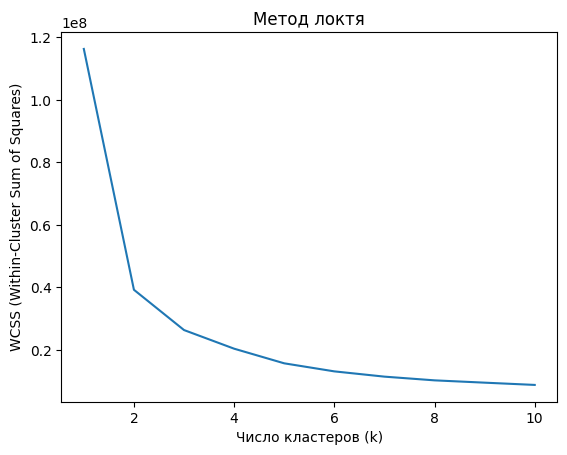

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(customer_data_filtered)  # Замените на ваш DataFrame
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Изгиб графика происходит в 2 и 3 - посмотрим на такие варианты подбора кластеров 

In [ ]:
from sklearn.metrics import silhouette_score

for k in [2, 3]:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(customer_data_filtered)
    silhouette_avg = silhouette_score(customer_data_filtered, kmeans.labels_)
    print(f'Силуэтный коэффициент для k={k}: {silhouette_avg}')


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Силуэтный коэффициент для k=2: 0.6433018604852412


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Силуэтный коэффициент для k=3: 0.574867732847574


Коэффициент лучше у варианта с 3 кластерами - обучим модель на 3 кластерах

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state=42)
kmeans.fit(customer_data_filtered)

customer_data_filtered['Cluster'] = kmeans.labels_

sk_kmeans_pred_res = kmeans.predict(customer_data_filtered)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Визуализируем работу K-means

In [ ]:
from sklearn.decomposition import PCA

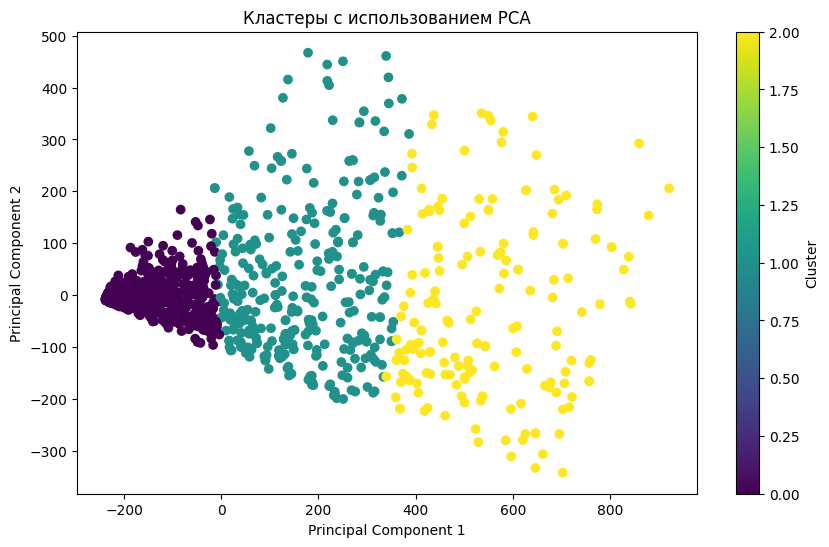

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_data_filtered)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=sk_kmeans_pred_res, cmap='viridis')
plt.title('Кластеры с использованием PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Видно, что области разделения кластеров сливаются, попробуем обучить другие модели

##### 2.2 Агломеративная иерархическая кластеризация

Подбор оптимального количества кластеров будет происходить через иерархическое дерево

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

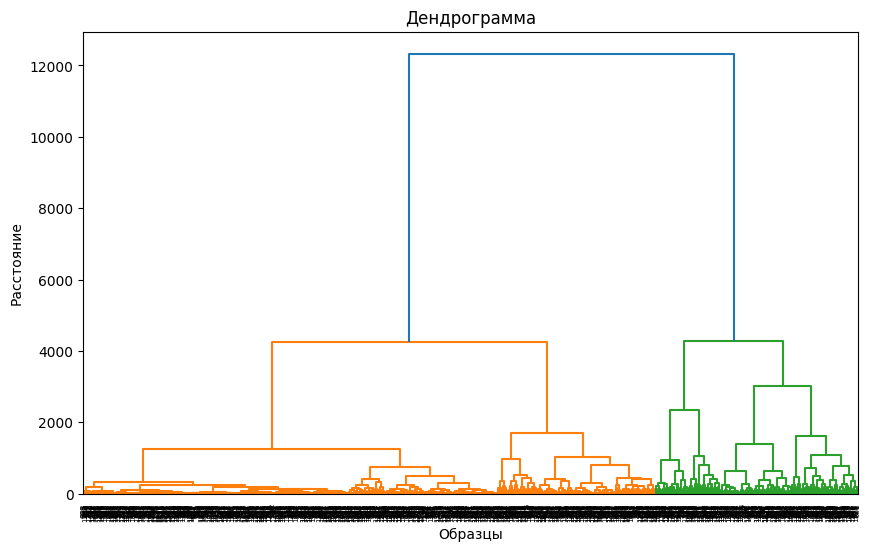

In [ ]:
linked = linkage(customer_data_filtered, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Дендрограмма')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.show()

Выбираем 3 кластера

In [223]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

In [230]:
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust_pred = agg_clust.fit_predict(customer_data_filtered)

clusters = agg_clust.labels_ 

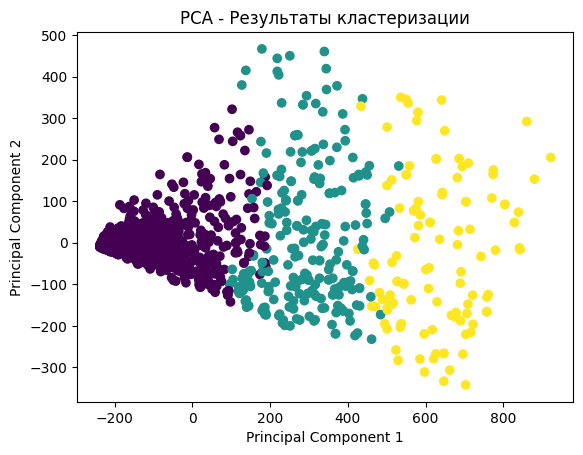

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(customer_data_filtered)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('PCA - Результаты кластеризации')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(customer_data_filtered, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.9973552998239058


Можно улучшить работу модели

##### 2.3 DBSCAN

In [235]:
from sklearn.cluster import DBSCAN

In [266]:
dbscan = DBSCAN(eps=0.1, min_samples=2)

dbscan.fit(customer_data_filtered)

clusters = dbscan.labels_

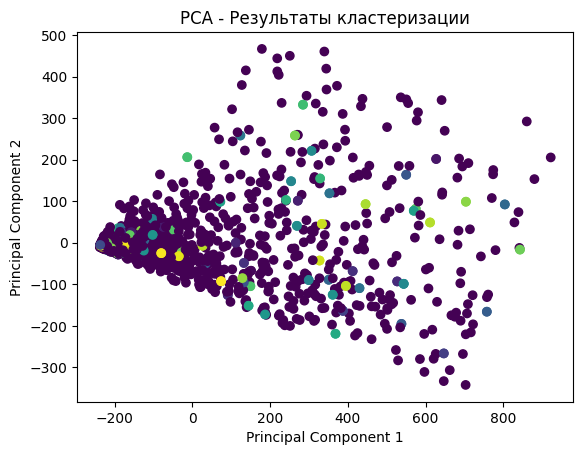

In [267]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(customer_data_filtered)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('PCA - Результаты кластеризации')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Модель плохо определяет кластеры

Самая лучшая обученная модель - K-Means